In [78]:
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [79]:
# importing data
df= pd.read_csv("dataframe_1.csv", index_col= 0)
df.head()

,title,date,location,area,year,rooms,total_price,unit_price,story,total_stories,elevator,parking,store
0,فردوس غرب / 82متر آفتابگیر / 2خ تاپ لوکیشن,۱ روز پیش در تهران,سازمان برنامه,۸۲,۱۳۸۴,۲,۶۳۰۰۰۰۰۰۰۰,۷۶۸۲۹۰۰۰,۲,5,آسانسور,پارکینگ,انباری
1,77متردوخوا/فول امکانات/سالن پرده خور/سازمان بر...,۱ روز پیش در تهران,سازمان برنامه,۷۷,۱۳۸۸,۲,۷۳۵۰۰۰۰۰۰۰,۹۵۴۵۴۰۰۰,۳,5,آسانسور,پارکینگ,انباری
2,۶۰متر۲خواب با پارکینگ (بلوار شقایق),۱ روز پیش در تهران,سازمان برنامه,۶۰,۱۳۸۴,۲,۵۲۵۰۰۰۰۰۰۰,۸۷۵۰۰۰۰۰,۱,4,آسانسور ندارد,پارکینگ,انباری
3,۵۷متر/فول امکانات/۷ متر پاسیو(سازمان برنامه),۱ روز پیش در تهران,سازمان برنامه,۵۷,۱۳۸۷,۱,۴۹۵۰۰۰۰۰۰۰,۸۶۸۴۲۰۰۰,۱,۱,آسانسور,پارکینگ,انباری
4,۸۵متر/۲خواب/سازمان برنامه مرکزی,۱ روز پیش در تهران,سازمان برنامه,۸۵,۱۳۹۷,۲,۹۱۰۰۰۰۰۰۰۰,۱۰۷۰۵۸۰۰۰,۲,۲,آسانسور,پارکینگ,انباری


In [80]:
# Checking imported data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 0 to 454
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          455 non-null    object
 1   date           455 non-null    object
 2   location       455 non-null    object
 3   area           455 non-null    object
 4   year           455 non-null    object
 5   rooms          455 non-null    object
 6   total_price    455 non-null    object
 7   unit_price     455 non-null    object
 8   story          455 non-null    object
 9   total_stories  455 non-null    object
 10  elevator       455 non-null    object
 11  parking        455 non-null    object
 12  store          455 non-null    object
dtypes: object(13)
memory usage: 49.8+ KB


In [82]:
# Cleaning data
df.drop(columns= ['title', 'date', 'location','unit_price', 'total_stories'], axis= 1, inplace= True)

In [83]:
df.head()

,area,year,rooms,total_price,story,elevator,parking,store
0,۸۲,۱۳۸۴,۲,۶۳۰۰۰۰۰۰۰۰,۲,آسانسور,پارکینگ,انباری
1,۷۷,۱۳۸۸,۲,۷۳۵۰۰۰۰۰۰۰,۳,آسانسور,پارکینگ,انباری
2,۶۰,۱۳۸۴,۲,۵۲۵۰۰۰۰۰۰۰,۱,آسانسور ندارد,پارکینگ,انباری
3,۵۷,۱۳۸۷,۱,۴۹۵۰۰۰۰۰۰۰,۱,آسانسور,پارکینگ,انباری
4,۸۵,۱۳۹۷,۲,۹۱۰۰۰۰۰۰۰۰,۲,آسانسور,پارکینگ,انباری


In [84]:
def make_int (x):
    return int(x)

df['area']= df['area'].apply(func= make_int)
df['year']= df['year'].apply(func= make_int)
df['rooms']= df['rooms'].apply(func= make_int)
df['total_price']= df['total_price'].apply(func= make_int)


In [85]:
def correct_str (x):
    return x.split(" ")[0]

story0= df['story'].apply(func= correct_str)
story0.replace (to_replace= "همکف", value= "0", inplace= True)

df['story']= story0.apply(func= make_int)

In [86]:
df= pd.get_dummies(data= df, columns= ['elevator', 'parking', 'store'])

In [87]:
df.drop(columns= ['elevator_آسانسور ندارد', 'parking_پارکینگ ندارد', 'store_انباری ندارد'], axis= 1, inplace= True)

In [88]:
df.rename(mapper={'elevator_آسانسور':'elevator', 'parking_پارکینگ':'parking', 'store_انباری':'store'},axis= 1, inplace= True )

In [89]:
def millions (x):
    return x/1000000
df['total_price']= df['total_price'].apply(func= millions)

In [90]:
df.head()

,area,year,rooms,total_price,story,elevator,parking,store
0,82,1384,2,6300.0,2,1,1,1
1,77,1388,2,7350.0,3,1,1,1
2,60,1384,2,5250.0,1,0,1,1
3,57,1387,1,4950.0,1,1,1,1
4,85,1397,2,9100.0,2,1,1,1


In [92]:
# defining variables 
X= df[["year", "area", "rooms", "story", "parking", "store", "elevator"]] 
y= df["total_price"]

# defining train and test sets
X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(X, y, test_size= 0.2)

In [93]:
# creating a linear model 
model= sklearn.linear_model.LinearRegression()

# fitting model 
model.fit(X_train, y_train)

# testing rtrained model 
y_pred_test= model.predict(X_test)

# 
print(sklearn.metrics.r2_score(y_test, y_pred_test))


0.9777819134186116


In [ ]:
# a sample case
Case_1= [1386, 86, 2, 5, 1, 1, 1]
print(model.predict([Case_1]))

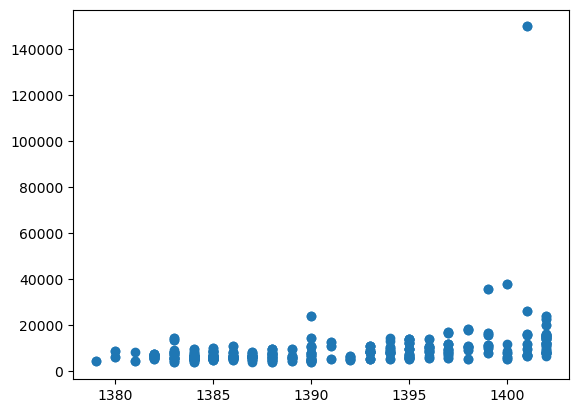

In [95]:
# 
plt.scatter(X["year"], y)
plt.show()